In [1]:
# Dependencies 
import sqlalchemy as sa
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
sa.__version__ 

'1.3.9'

In [2]:
# Hiding my password in my_keys.py
from my_keys import postgres_password
from matplotlib.ticker import StrMethodFormatter

# Import the SQL database into Pandas.
postgres = 'postgres'
engine = create_engine('postgresql://postgres:' + postgres_password + '@localhost:5432/Test')
conn = engine.connect()


In [3]:
# Creating salaries table
salaries = pd.read_sql("SELECT * FROM salaries", conn)
salaries.shape

(300024, 4)

In [4]:
salaries.head()

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10002,65828,1996-08-03,1997-08-03
2,10003,40006,1995-12-03,1996-12-02
3,10004,40054,1986-12-01,1987-12-01
4,10005,78228,1989-09-12,1990-09-12


In [5]:
# Create a histogram to visualize the most common salary ranges for employees.
import os
import seaborn as sns
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import sem

mode : 0    40000
dtype: int64
median : 48681.0
Minimum Salary : 40000
Maximum Salary : 129492
Total counts : 300024
The mean Salaries of all Employees is: 52970.73


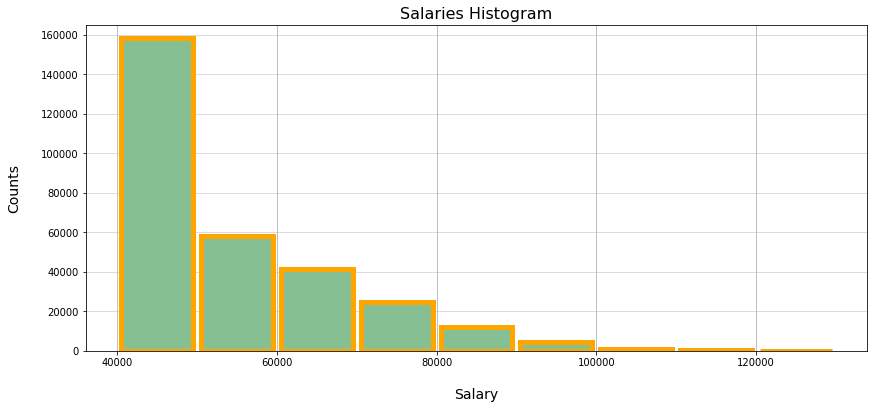

In [6]:
# An "interface" to matplotlib.axes.Axes.hist() method

ax = salaries.hist(column='salary', bins=[40000,50000,60000,70000,80000, 90000, 100000, 110000, 120000, 130000], grid=True, figsize=(14,6), color='#86bf91', zorder=2, rwidth=0.9, edgecolor='orange', linewidth=5)

plt.grid(axis='y', alpha=0.55)
plt.ylabel('Counts', labelpad=20, size=14)
plt.xlabel('Salary', labelpad=20, size=14)
plt.title('Salaries Histogram',  size=16)

maxFreq = salaries['salary'].max()
minFreq = salaries['salary'].min()

# Set a clean upper y-axis limit.
plt.ylim(0 , 165000)
# plt.ylim(ymax= maxFreq + 1000)
mode = salaries['salary'].mode()
mean = salaries['salary'].mean()
median = salaries['salary'].median()
print(f"mode : {mode}")
print(f"median : {median}")

print(f"Minimum Salary : {minFreq}")
print(f"Maximum Salary : {maxFreq}")
print(f"Total counts : {salaries['salary'].count()}")
print(f"The mean Salaries of all Employees is: {round(salaries.salary.mean(),2)}")

      
      

In [7]:
# Create a bar chart of average salary by title.

# Creating employees table
employees = pd.read_sql("SELECT * FROM employees", conn)
employees.shape

# Creating titles table
titles = pd.read_sql("SELECT * FROM titles", conn)
titles.shape

(443308, 4)

In [8]:
# Merge employees and salaries 
employees_salaries = pd.merge(employees, salaries, on="emp_no", how="inner")
employees_salaries.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,60117,1986-06-26,1987-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,65828,1996-08-03,1997-08-03
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,40006,1995-12-03,1996-12-02
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,40054,1986-12-01,1987-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12,78228,1989-09-12,1990-09-12


In [9]:
# Merge Data employees_salaries and employees_salaries
employees_salaries_titles = pd.merge(employees_salaries, titles, on="emp_no", how="inner")
employees_salaries_titles.shape

(443308, 12)

In [10]:
employees_salaries_titles.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date_x,to_date_x,title,from_date_y,to_date_y
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,60117,1986-06-26,1987-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,65828,1996-08-03,1997-08-03,Staff,1996-08-03,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,40006,1995-12-03,1996-12-02,Senior Engineer,1995-12-03,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,40054,1986-12-01,1987-12-01,Engineer,1986-12-01,1995-12-01
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,40054,1986-12-01,1987-12-01,Senior Engineer,1995-12-01,9999-01-01


In [56]:
# Group by titles
group_df = round(employees_salaries_titles.groupby("title").mean(), 2)
group_df
group_df['counts'] = employees_salaries_titles.groupby("title")['emp_no'].count()
group_df
group_df = group_df.drop(columns = "emp_no")

,emp_no,salary,counts
title,,,
Assistant Engineer,251495.40,48493.20,15128
Engineer,252943.16,48539.78,115003
Manager,110780.83,51531.04,24
Senior Engineer,253034.38,48506.75,97750
Senior Staff,253423.37,58503.29,92853
Staff,253399.24,58465.27,107391
Technique Leader,251708.95,48580.51,15159


In [61]:

group_df = group_df.reset_index(drop = False)

group_df = group_df.sort_values(by=['salary'])
group_df

,title,salary,counts
0,Assistant Engineer,48493.20,15128
3,Senior Engineer,48506.75,97750
1,Engineer,48539.78,115003
6,Technique Leader,48580.51,15159
2,Manager,51531.04,24
5,Staff,58465.27,107391
4,Senior Staff,58503.29,92853


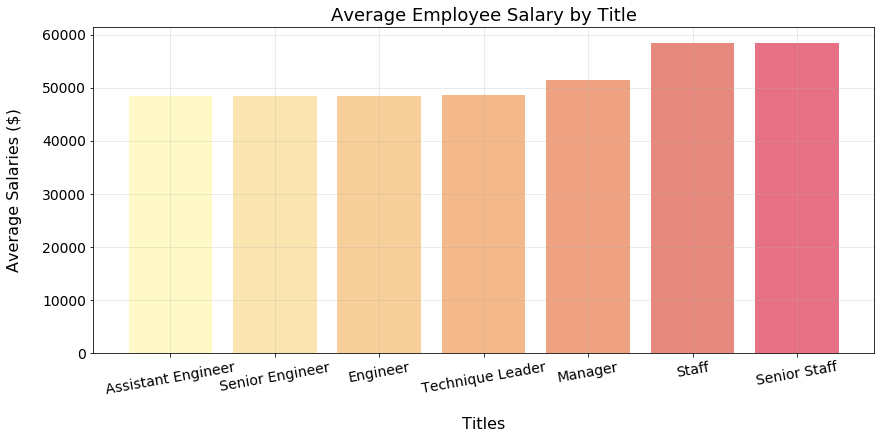

In [67]:
# Set x_axis, y_axis & Tick Locations
x_axis = group_df["title"]
ticks = np.arange(len(x_axis))
y_axis = group_df["salary"]
 

plt.bar(x_axis, y_axis, align="center",  alpha=0.75, color=["#fff7b5", "#f9dc95", "#f5bf79", "#f0a265", "#e98357", "#e06251", "#de425b"])

# Create Ticks for x_axis
plt.xticks(ticks, x_axis, rotation=10, fontsize = 14)
plt.yticks(fontsize = 14)

fig = plt.gcf()
fig.set_size_inches(14, 6)

# Set Labels & Title
plt.ylabel("Average Salaries ($)", labelpad=20, size=16)
plt.xlabel("Titles", labelpad=20, size=16)
plt.title("Average Employee Salary by Title", size=18)
plt.grid(True, alpha = 0.3)

# Save Figure
plt.savefig("avr_salary_by_title.png")


# Show plot
plt.show()



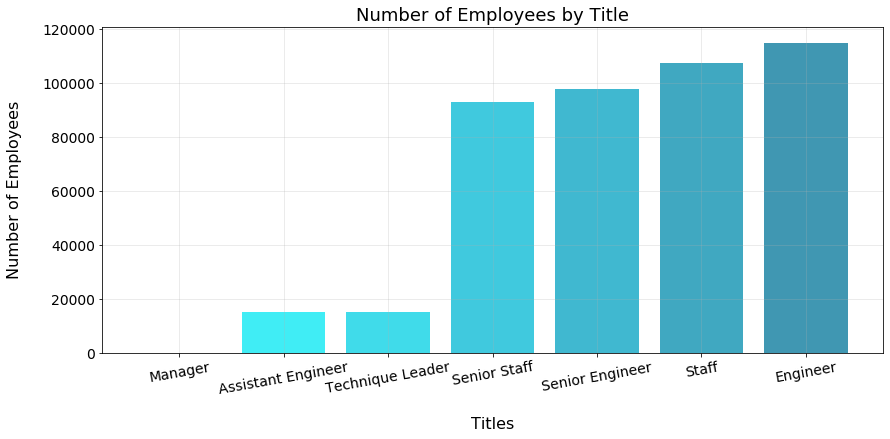

In [68]:
group_counts_df = group_df.sort_values(by=['counts'])
group_counts_df


# Set x_axis, y_axis & Tick Locations
x_axis = group_counts_df["title"]
ticks = np.arange(len(x_axis))
y_axis = group_counts_df["counts"]
 

plt.bar(x_axis, y_axis, align="center",  alpha=0.75, color=["#00ffff", "#00e7f2", "#00cfe3", "#00b8d3", "#00a1c1", "#008bad", "#007599"])

# Create Ticks for x_axis
plt.xticks(ticks, x_axis, rotation=10, fontsize = 14)
plt.yticks(fontsize = 14)

fig = plt.gcf()
fig.set_size_inches(14, 6)

# Set Labels & Title
plt.ylabel("Number of Employees", labelpad=20, size=16)
plt.xlabel("Titles", labelpad=20, size=16)
plt.title("Number of Employees by Title", size=18)
plt.grid(True, alpha = 0.3)

# Save Figure
plt.savefig("num_of_employees_by_title.png")


# Show plot
plt.show()

